In [5]:
import xarray as xr
import glob

In [22]:
cor_files = glob.glob('/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/reanalysis_data/ERA5/regression_vars/coarsened/*.nc')

In [10]:
cor_files[0]

'/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/reanalysis_data/ERA5/regression_vars/coarsened/10m_u_component_of_wind_2014.nc'

In [12]:
w  = xr.open_dataset(cor_files[0])

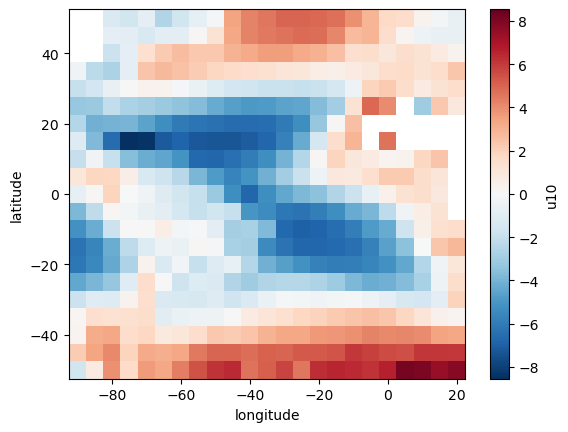

In [18]:
w.u10.mean('time').plot()

In [23]:
cor_files

['/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/reanalysis_data/ERA5/regression_vars/coarsened/10m_u_component_of_wind_2014.nc',
 '/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/reanalysis_data/ERA5/regression_vars/coarsened/10m_u_component_of_wind_2015.nc',
 '/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/reanalysis_data/ERA5/regression_vars/coarsened/10m_u_component_of_wind_2016.nc',
 '/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/reanalysis_data/ERA5/regression_vars/coarsened/10m_u_component_of_wind_2017.nc',
 '/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/reanalysis_data/ERA5/regression_vars/coarsened/10m_u_component_of_wind_2018.nc',
 '/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/reanalysis_data/ERA5/regression_vars/coarsened/10m_u_component_of_wind_2019.nc',
 '/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/reanalysis_data/ERA5/regression_vars/coarsened/10m_u_component_of_wind_2021.nc',
 '/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/reanalysi

In [57]:
import xarray as xr
import os
from collections import defaultdict
import re

# List of file paths
file_paths = cor_files

# Function to extract the variable name and (optionally) pressure level from a file name
# Function to extract the variable name and (optionally) pressure level from a file name
def extract_var_and_level(filename):
    # Regular expression to match the variable name and year (with optional level)
    match = re.match(r'(.+?)_(\d{4})(?:_(\d+hPa))?\.nc', filename)
    if not match:
        raise ValueError(f"Filename {filename} doesn't match the expected pattern")
    var = match.group(1)
    year = match.group(2)
    level = match.group(3)
    return var, level, year

# Organize file paths by variable and level
files_by_var_and_level = defaultdict(list)

for fp in file_paths:
    var, level, year = extract_var_and_level(os.path.basename(fp))
    key = (var, level)
    files_by_var_and_level[key].append(fp)

# Create a dictionary to store the datasets
datasets = {}

for (var, level), files in files_by_var_and_level.items():
    # Sort the files to ensure they are in chronological order
    files.sort()
    # Open each file and concatenate them manually along the time dimension
    ds_list = [xr.open_dataset(f) for f in files]
    ds = xr.concat(ds_list, dim='time')
    # Store the dataset in the dictionary with a descriptive key
    key = f"{var}_{level}" if level else var
    datasets[key] = ds

# # Example: Access a specific dataset
# low_cloud_cover_ds = datasets['low_cloud_cover']
# print(low_cloud_cover_ds)

In [47]:
ds = xr.open_mfdataset(files[0], combine='by_coords')

In [60]:
datasets.keys()

dict_keys(['10m_u_component_of_wind', '10m_v_component_of_wind', 'EIS', 'boundary_layer_height', 'low_cloud_cover', 'mean_sea_level_pressure', 'mean_surface_latent_heat_flux', 'mean_surface_sensible_heat_flux', 'relative_humidity_300hPa', 'relative_humidity_500hPa', 'relative_humidity_700hPa', 'relative_humidity_925hPa', 'sea_surface_temperature', 'sulphate_aerosol_optical_depth_550nm', 'temperature_300hPa', 'temperature_500hPa', 'temperature_700hPa', 'temperature_925hPa', 'temperature', 'total_aerosol_optical_depth_550nm', 'u_component_of_wind_300hPa', 'u_component_of_wind_500hPa', 'u_component_of_wind_700hPa', 'u_component_of_wind_925hPa', 'v_component_of_wind_300hPa', 'v_component_of_wind_500hPa', 'v_component_of_wind_700hPa', 'v_component_of_wind_925hPa', 'vertical_velocity_300hPa', 'vertical_velocity_500hPa', 'vertical_velocity_700hPa', 'vertical_velocity_925hPa'])

In [106]:
list(datasets['u_component_of_wind_500hPa'].keys())

['u']

In [107]:
datasets['10m_u_component_of_wind']

<xarray.Dataset>
Dimensions:    (latitude: 21, longitude: 23, time: 2393)
Coordinates:
  * latitude   (latitude) int64 -50 -45 -40 -35 -30 -25 ... 25 30 35 40 45 50
  * longitude  (longitude) int64 -90 -85 -80 -75 -70 -65 -60 ... -5 0 5 10 15 20
  * time       (time) datetime64[ns] 2014-01-01 2014-01-02 ... 2021-12-31
Data variables:
    u10        (latitude, longitude, time) float64 nan nan nan ... -0.6927 1.664

In [4]:
client.dashboard_link

'http://127.0.0.1:8787/status'

yes


In [13]:
import glob
import numpy as np
import pandas as pd
import datetime
import xarray as xr
from multiprocessing import Pool
from os import path
import dask.dataframe as dd
from dask.distributed import Client



def myround(x, base=5):
    return base * round(x/base)
def albedo(COT):
    a=COT/((4/3 /0.15) + COT)
    return a
if client: client.close()
client = Client(memory_limit='33GB', local_directory='/work/scratch-pw3'  )

files = glob.glob('/gws/nopw/j04/eo_shared_data_vol1/satellite/modistracks/20??/inc_EIS_par_??')
files_n = glob.glob('/gws/nopw/j04/eo_shared_data_vol1/satellite/modistracks/nnull/20??/null_??_par')
savepath = '/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/reanalysis_data/ERA5/regression_vars/coarsened/'

dtypes={'latitude':np.float32, 'longitude':np.float32, 'r_eff':np.float32, 'npoints':np.float32, 'LWP':np.float32, 'COT':np.float32,
'CTH':np.float32, 'signal':np.float32,  'particle':np.int32, 'latitude_1':np.float32, 'longitude_1':np.float32,
'r_eff_1':np.float32, 'LWP_1':np.float32, 'COT_1':np.float32, 'CTH_1':np.float32, 'npoints_1':np.float32, 'latitude_3':np.float32,
'longitude_3':np.float32, 'r_eff_3':np.float32, 'LWP_3':np.float32, 'COT_3':np.float32, 'CTH_3':np.float32, 'npoints_3':np.float32,
'terra':np.bool_, 'ocean':np.bool_,'Nd':np.float32, 'Nd_1':np.float32 , 'Nd_3':np.float32,  'hours_diff':np.int32, 'chil':np.bool_, 'azor':np.bool_, 'cver':np.bool_, 'ango':np.bool_},

2024-06-04 16:03:03,296 - distributed.nanny - WARNING - Worker process still alive after 3.999999237060547 seconds, killing


In [7]:
for var in ['r_eff', 'Nd', 'COT', 'LWP', 'npoints', 'signal'][1:]:
    client.restart()
    print(var)
    if var=='signal': colu = [var, 'ocean', 'longitude','latitude','overpass']
    else: colu = [var,var+'_1', var+'_3', 'ocean', 'longitude','latitude','overpass']
    h5 = dd.read_parquet(files,
                     columns=colu,
                     dtype=dtypes,
                     blocksize=200e6)
    h5['la'] = h5.latitude.map_partitions(lambda x: x.apply(myround, ), meta=(None, float))
    h5['lo'] = h5.longitude.map_partitions(lambda x: x.apply(myround, ), meta=(None, float))
    h5['date'] = h5.overpass.dt.date
    if var=='COT':
        h5['albedo']=h5.COT.map_partitions(albedo)
        h5['albedo_1']=h5.COT_1.map_partitions(albedo)
        h5['albedo_3']=h5.COT_3.map_partitions(albedo)
        var='albedo'

    filtered_data = h5[h5.ocean]

    # Group and compute means
    diff_mean = filtered_data.groupby(['la', 'lo', 'date'])[var].mean().compute().to_xarray()
    diff_mean['date'] = pd.to_datetime(diff_mean.date)
    diff_mean.to_netcdf(savepath+var+'.nc')
    
    if var=='signal': continue
    else: 
        diff2_mean = filtered_data.groupby(['la', 'lo', 'date'])[var+'_1'].mean().compute().to_xarray()
        diff2_mean['date'] = pd.to_datetime(diff2_mean.date)
        diff2_mean.to_netcdf(savepath+var+'_1.nc')
        
        diff3_mean = filtered_data.groupby(['la', 'lo', 'date'])[var+'_3'].mean().compute().to_xarray()
        diff3_mean['date'] = pd.to_datetime(diff3_mean.date)
        diff3_mean.to_netcdf(savepath+var+'_3.nc')

/home/users/pete_nut/miniconda3/envs/petes_env/lib/python3.8/contextlib.py:120: UserWarning: Creating scratch directories is taking a surprisingly long time. (3.41s) This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)
/home/users/pete_nut/miniconda3/envs/petes_env/lib/python3.8/contextlib.py:120: UserWarning: Creating scratch directories is taking a surprisingly long time. (3.43s) This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)
/home/users/pete_nut/miniconda3/envs/petes_env/lib/python3.8/contextlib.py:120: UserWarning: Creating scratch directories is taking a surprisingly long time. (3.42s) This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local dis

Nd


2024-06-04 10:17:03,506 - distributed.worker_memory - WARNING - Worker tcp://127.0.0.1:45694 (pid=10303) exceeded 95% memory budget. Restarting...
2024-06-04 10:17:08,601 - distributed.nanny - WARNING - Restarting worker
2024-06-04 10:17:29,005 - distributed.worker_memory - WARNING - Worker tcp://127.0.0.1:37684 (pid=30425) exceeded 95% memory budget. Restarting...
2024-06-04 10:17:32,547 - distributed.nanny - WARNING - Restarting worker
/home/users/pete_nut/miniconda3/envs/petes_env/lib/python3.8/contextlib.py:120: UserWarning: Creating scratch directories is taking a surprisingly long time. (16.54s) This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)
2024-06-04 10:22:53,133 - distributed.worker - ERROR - Worker stream died during communication: tcp://127.0.0.1:34428
Traceback (most recent call last):
  File "/home/users/pete_nut/miniconda3/envs/petes_env/lib/pytho

KeyboardInterrupt: 

In [16]:
client.restart()
client.cluster.scale(8)

2024-06-04 14:10:31,034 - distributed.nanny - WARNING - Restarting worker
2024-06-04 14:10:31,148 - distributed.nanny - WARNING - Restarting worker
2024-06-04 14:10:32,172 - distributed.nanny - WARNING - Worker process still alive after 1.5999990463256837 seconds, killing
2024-06-04 14:10:32,220 - distributed.nanny - WARNING - Worker process still alive after 1.5999988555908204 seconds, killing
2024-06-04 14:10:32,221 - distributed.nanny - WARNING - Worker process still alive after 1.5999994277954102 seconds, killing
2024-06-04 14:10:32,579 - distributed.diskutils - INFO - Found stale lock file and directory '/work/scratch-pw3/dask-worker-space/worker-ofkhmr_3', purging
2024-06-04 14:10:34,952 - distributed.scheduler - WARNING - Worker tried to connect with a duplicate name: 3
2024-06-04 14:10:34,954 - distributed.worker - ERROR - Unable to connect to scheduler: name taken, 3
2024-06-04 14:10:34,957 - distributed.nanny - ERROR - Failed to start worker
Traceback (most recent call last):

KeyboardInterrupt: 

2024-06-04 14:11:00,932 - distributed.nanny - WARNING - Restarting worker
2024-06-04 14:11:01,072 - distributed.nanny - WARNING - Restarting worker
2024-06-04 14:11:01,086 - distributed.nanny - WARNING - Restarting worker


In [15]:
for  year in ['2014', '2015','2016','2017','2018','2019','2021']:
    files = glob.glob(f'/gws/nopw/j04/eo_shared_data_vol1/satellite/modistracks/{year}/inc_EIS_par_??')
    for var in ['r_eff', 'Nd', 'COT', 'LWP', 'npoints', 'signal'][1:2]:
        print(var)

        for var_suffix in ['', '_1', '_3']:
            if var == 'signal' and var_suffix != '':
                continue

            colu = [var+var_suffix, 'ocean', 'longitude', 'latitude', 'overpass']
            h5 = dd.read_parquet(files,
                                 columns=colu,
                                 dtype=dtypes,
                                 blocksize=200e6)
            h5['la'] = h5.latitude.map_partitions(lambda x: x.apply(myround, ), meta=(None, float))
            h5['lo'] = h5.longitude.map_partitions(lambda x: x.apply(myround, ), meta=(None, float))
            h5['date'] = h5.overpass.dt.date

            if var == 'COT':
                h5['albedo'] = h5[var+var_suffix].map_partitions(albedo)
                var_name = 'albedo' + var_suffix
            else:
                var_name = var + var_suffix

            filtered_data = h5[h5.ocean]
            print(var_name)
            diff_mean = filtered_data.groupby(['la', 'lo', 'date'])[var_name].mean().compute().to_xarray()
            diff_mean['date'] = pd.to_datetime(diff_mean.date)
            diff_mean.to_netcdf(savepath+var_name+'_'+year+'.nc')
            client.restart()
            client.cluster.scale(8)

Nd
Nd


2024-06-04 13:51:34,941 - distributed.worker - ERROR - Worker stream died during communication: tcp://127.0.0.1:34938
Traceback (most recent call last):
  File "/home/users/pete_nut/miniconda3/envs/petes_env/lib/python3.8/site-packages/distributed/comm/core.py", line 328, in connect
    handshake = await asyncio.wait_for(comm.read(), time_left())
  File "/home/users/pete_nut/miniconda3/envs/petes_env/lib/python3.8/asyncio/tasks.py", line 501, in wait_for
    raise exceptions.TimeoutError()
asyncio.exceptions.TimeoutError

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/users/pete_nut/miniconda3/envs/petes_env/lib/python3.8/site-packages/distributed/worker.py", line 1985, in gather_dep
    response = await get_data_from_worker(
  File "/home/users/pete_nut/miniconda3/envs/petes_env/lib/python3.8/site-packages/distributed/worker.py", line 2727, in get_data_from_worker
    return await retry_operation(_get_data, operat

KeyboardInterrupt: 

Exception ignored in: <bound method GCDiagnosis._gc_callback of <distributed.utils_perf.GCDiagnosis object at 0x7fc5d302b2e0>>
Traceback (most recent call last):
  File "/home/users/pete_nut/miniconda3/envs/petes_env/lib/python3.8/site-packages/distributed/utils_perf.py", line 182, in _gc_callback
    if info["generation"] != 2:
KeyboardInterrupt: 
2024-06-04 14:09:45,556 - distributed.nanny - ERROR - Worker process died unexpectedly
2024-06-04 14:09:49,629 - distributed.nanny - WARNING - Restarting worker
2024-06-04 14:09:50,156 - distributed.nanny - ERROR - Worker process died unexpectedly
2024-06-04 14:09:52,249 - distributed.nanny - WARNING - Restarting worker
2024-06-04 14:09:52,621 - distributed.diskutils - INFO - Found stale lock file and directory '/work/scratch-pw3/dask-worker-space/worker-o_yhucap', purging
2024-06-04 14:09:52,734 - distributed.nanny - ERROR - Worker process died unexpectedly
2024-06-04 14:09:56,634 - distributed.nanny - WARNING - Restarting worker
2024-06-04

In [21]:
for  year in ['2014', '2015','2016','2017','2018','2019','2021'][:1]:
    files = glob.glob(f'/gws/nopw/j04/eo_shared_data_vol1/satellite/modistracks/{year}/inc_EIS_par_??')
    for var in ['r_eff', 'Nd', 'COT', 'LWP', 'npoints', 'signal'][1:2]:
        print(var)

        for var_suffix in ['', '_1', '_3']:
            if var == 'signal' and var_suffix != '':
                continue

            colu = [var+var_suffix, 'ocean', 'longitude', 'latitude', 'overpass']
            h5 = pd.read_parquet(files,
                                 columns=colu,)
                                 # dtype=dtypes,
                                 # blocksize=200e6)
            h5['la'] = h5.latitude.apply(myround, )
            h5['lo'] = h5.longitude.apply(myround, )
            h5['date'] = h5.overpass.dt.date

            if var == 'COT':
                h5['albedo'] = h5[var+var_suffix].apply(albedo)
                var_name = 'albedo' + var_suffix
            else:
                var_name = var + var_suffix

            filtered_data = h5[h5.ocean]
            print(var_name)
            diff_mean = filtered_data.groupby(['la', 'lo', 'date'])[var_name].mean().to_xarray()
            diff_mean['date'] = pd.to_datetime(diff_mean.date)
            diff_mean.to_netcdf(savepath+var_name+'_'+year+'.nc')
            
            if var_name=='albedo': 
                diff_mean = filtered_data.groupby(['la', 'lo', 'date'])[var_name].count().to_xarray()
                diff_mean['date'] = pd.to_datetime(diff_mean.date)
                diff_mean.to_netcdf(savepath+'count_'+var_name+'_'+year+'.nc')
            

Nd
Nd
Nd_1
Nd_3


In [18]:
h5['la'] = h5.latitude.apply(myround, )

In [20]:
h5['lo'] = h5.longitude.apply(myround,)

TypeError: myround() got an unexpected keyword argument 'engine'